# Site 734 Old
This notebook calculates and plots the enrichment of codons at site 734 in the early gDNA samples compared to the plasmid.

**Sample Info**

In [1]:
stage = "na"
sort_status = "na"

## Notebook setup
Imports

In [2]:
import pandas as pd
import plotnine as p9

# print imports and versions
# copied from https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
print('\n'.join(f'{m.__name__}=={m.__version__}' \
                for m in globals().values() if getattr(m, '__version__', None)))

%run ../functions/enrichment.py.ipynb import calculate_enrichment

pandas==0.25.3
plotnine==0.6.0


Input data

In [3]:
site_734_counts = '../old_codon_counts.csv'
permitted_codons_file = '../results/site_734/permitted_codons.csv'
stat2_luciferase_file = '../data/STAT2_luciferase_results.csv'

Output data

In [4]:
site_734_dir = '../results/site_734/'

Notebook aesthetics

In [5]:
p9.theme_set(p9.theme_classic())
CBPALETTE_RICH = ['#648FFF', '#FFB000', '#DC267F', '#785EF0', '#FE6100']

## Load data
Load site 734 frequencies

In [6]:
codon_counts = pd.read_csv(site_734_counts)
codon_counts = codon_counts.rename(columns={'sample_name':'name'})
display(codon_counts)

,name,codon,count,sample_total,frequency,letter
0,Mut_NS5_Sample,ATT,169080,1673429,0.101038,I
1,Mut_NS5_Sample,CGC,162366,1673429,0.097026,R
2,Mut_NS5_Sample,TAG,136769,1673429,0.081730,O
3,Mut_NS5_Sample,CCT,112566,1673429,0.067267,P
4,Mut_NS5_Sample,ATG,110051,1673429,0.065764,M
...,...,...,...,...,...,...
163,WT_Plasmid,TCT,182,12340,0.014749,S
164,WT_Plasmid,TAC,153,12340,0.012399,Y
165,WT_Plasmid,TGG,134,12340,0.010859,W
166,WT_Plasmid,GGA,106,12340,0.008590,G


In [7]:
codon_counts['name'].unique()

array(['Mut_NS5_Sample', 'Mut_Plasmid', 'Mut_Rnd1_mCherry_neg',
       'Mut_Rnd1_mCherry_pos', 'Mut_Rnd2_mCherry_neg',
       'Mut_Rnd2_mCherry_pos', 'WT_NS5_Sample', 'WT_Plasmid'],
      dtype=object)

## Plot enrichment for each library:

In [8]:
libs = ['lib1', 'lib2', 'lib3']

Calculating enrichment between:
Mut_Rnd1_mCherry_neg and Mut_NS5_Sample


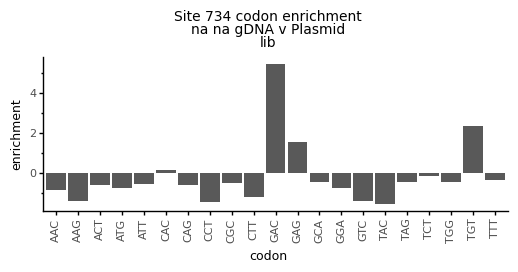

<ggplot: (8752218625601)>

In [18]:
for lib in ['lib']:
    selected_sample='Mut_Rnd1_mCherry_neg'
    reference_sample='Mut_NS5_Sample'
    print('Calculating enrichment between:')
    print(f'{selected_sample} and {reference_sample}')
    enrichment_df = calculate_enrichment(
        codon_counts,
        selected_sample,
        reference_sample)
    enrichment_plot = (p9.ggplot(enrichment_df) +
                    p9.aes(x='codon',
                           y='enrichment') +
                    p9.geom_bar(stat='identity') +
                    p9.ggtitle('Site 734 codon enrichment\n'
                               f'{stage} {sort_status} gDNA v Plasmid\n'
                               f'{lib}') +
                    p9.labs(x='codon',
                            y='enrichment') +
                    p9.theme(figure_size=(6, 2),
                             plot_title=p9.element_text(size=10),
                             axis_title=p9.element_text(size=9),
                             axis_text_x=p9.element_text(size=8, rotation=90),
                             axis_text_y=p9.element_text(size=8))
                   )

    display(enrichment_plot)

## Comparison to STAT2 antagonism luciferase assay
Each of these amino acids has previously been tested for ability to antagonize STAT2 in a luciferase assay. How do the sequencing-based enrichment scores correlate with the luciferase assay results?

In [10]:
stat2_results = pd.read_csv(stat2_luciferase_file)
display(stat2_results.sort_values(by='FLUC_RLUC'))

,amino_acid,FLUC_RLUC
20,D,1.6
19,E,6.4
18,S,48.9
17,C,54.3
16,N,77.9
15,T,88.8
14,W,90.7
13,Q,95.2
12,H,96.8
11,A,105.8


Calculate enrichment for mean counts:

In [16]:
lib = "mean"

selected_sample='Mut_Rnd1_mCherry_neg'
reference_sample='Mut_NS5_Sample'
print('Calculating enrichment between:')
print(f'{selected_sample} and {reference_sample}')
enrichment_df = calculate_enrichment(
    codon_counts,
    selected_sample,
    reference_sample)
display(enrichment_df)

Calculating enrichment between:
Mut_Rnd1_mCherry_neg and Mut_NS5_Sample


,codon,letter,count_selected,count_pseudo_selected,count_reference,count_pseudo_reference,enrichment
0,GAC,D,222684,222684.1,7427,7427.1,5.452012
1,TGT,C,196330,196330.1,56610,56610.1,2.340107
2,ATT,I,80220,80220.1,169080,169080.1,-0.529715
3,CGC,R,79478,79478.1,162366,162366.1,-0.484665
4,TAG,O,68227,68227.1,136769,136769.1,-0.457369
5,TGG,W,45471,45471.1,91857,91857.1,-0.468485
6,CAC,H,44844,44844.1,57928,57928.1,0.176611
7,ATG,M,44783,44783.1,110051,110051.1,-0.751191
8,GAG,E,40434,40434.1,20142,20142.1,1.551315
9,CAG,Q,39340,39340.1,85729,85729.1,-0.577828


Plot correlation to luciferase assay:

,enrichment,amino_acid,FLUC_RLUC
0,5.452012,D,1.6
8,1.551315,E,6.4
11,-0.137314,S,48.9
1,2.340107,C,54.3
16,-0.819559,N,77.9
14,-0.571756,T,88.8
5,-0.468485,W,90.7
9,-0.577828,Q,95.2
6,0.176611,H,96.8
10,-0.424867,A,105.8


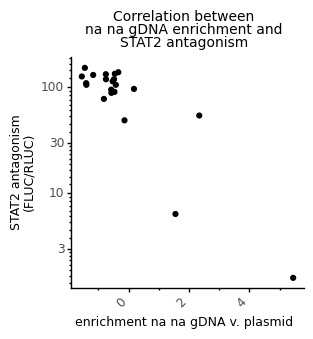

<ggplot: (8752227601425)>

In [17]:
enrichment_stat2_corr = (pd.merge(
    left=enrichment_df[['letter','enrichment']],
    right=stat2_results,
    left_on='letter',
    right_on='amino_acid',
    how='outer')
    .drop(columns='letter'))
display(enrichment_stat2_corr.sort_values(by='FLUC_RLUC'))

enrichment_stat2_corr_plot = (
    p9.ggplot(enrichment_stat2_corr) +
    p9.aes(x='enrichment',
           y='FLUC_RLUC') +
    p9.geom_point() +
    p9.ggtitle(f'Correlation between\n{stage} {sort_status} gDNA enrichment and\nSTAT2 antagonism') +
    p9.labs(x=f'enrichment {stage} {sort_status} gDNA v. plasmid',
            y='STAT2 antagonism\n(FLUC/RLUC)') +
    p9.scale_y_log10() +
    p9.theme(figure_size=(3,3),
             plot_title=p9.element_text(size=10),
             axis_title=p9.element_text(size=9),
             axis_text_x=p9.element_text(rotation=45, hjust=1),
             legend_position='right',
             legend_title=p9.element_text(size=10),
             legend_title_align='center'))

display(enrichment_stat2_corr_plot)